In [ ]:
### 딥러닝 구현 (2D -> 3D Lifting)ㅡ

In [ ]:
### Training Data 불러오기 

In [7]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10591316449456703420, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7250706432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18342041284615382350
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

In [5]:
import os 
os.getcwd() 

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, InputLayer, Input, add, dot, maximum, average, multiply, concatenate, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import AUC
import numpy as np
import pandas as pd

In [8]:
data_2D = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_2D.csv')
data_3D = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_3D.csv')

In [9]:
data_2D

,spine_x,spine_y,pelvis_x,pelvis_y,neck_x,neck_y,head_x,head_y,head_top_x,head_top_y,left_shoulder_x,left_shoulder_y,left_elbow_x,left_elbow_y,left_wrist_x,left_wrist_y,right_shoulder_x,right_shoulder_y,right_elbow_x,right_elbow_y,right_wrist_x,right_wrist_y,left_hip_x,left_hip_y,left_knee_x,left_knee_y,left_ankle_x,left_ankle_y,right_hip_x,right_hip_y,right_knee_x,right_knee_y,right_ankle_x,right_ankle_y
0,1045.154013,811.919888,1036.030,926.994,1053.740,673.728,1056.000,626.481,1063.030,532.687,1115.950,726.298,1284.060,744.569,1416.430,769.338,983.890,705.933,827.189,722.146,705.875,723.936,1096.34500,932.52375,1056.0300,1197.51,1036.640,1373.22,975.71500,921.46425,991.061,1191.20,1003.010,1377.67
1,1045.241871,790.979925,1037.130,906.644,1052.650,651.738,1054.400,604.069,1060.810,509.405,1115.190,704.307,1284.080,721.920,1417.030,746.177,982.994,685.274,826.790,704.372,705.752,707.636,1097.52750,911.71925,1060.5400,1177.46,1044.620,1346.11,976.73250,901.56875,997.305,1169.49,1021.660,1339.42
2,1046.377784,812.694025,1036.700,927.584,1055.040,674.819,1056.410,627.618,1060.710,533.689,1117.480,727.212,1285.430,745.979,1417.570,771.727,984.734,706.460,827.232,720.964,705.459,723.377,1096.97300,933.26825,1056.0400,1198.70,1035.450,1373.84,976.42700,921.89975,989.540,1193.89,1004.470,1374.86
3,1046.631937,813.177984,1036.890,927.904,1054.890,675.446,1055.780,628.205,1059.280,534.698,1118.350,726.871,1286.330,745.824,1418.620,771.628,984.234,706.367,826.354,719.724,704.649,723.487,1097.04675,933.59950,1056.0700,1199.06,1035.250,1376.43,976.73325,922.20850,990.707,1194.47,1005.650,1375.54
4,1046.446123,814.036862,1036.190,928.612,1054.730,676.361,1055.520,629.082,1059.410,536.350,1118.890,726.990,1286.810,746.285,1419.020,772.546,983.822,706.555,825.833,718.929,704.388,723.409,1096.22000,934.61125,1055.2700,1200.03,1034.720,1377.45,976.16000,922.61275,989.659,1195.19,1003.840,1376.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16344,240.004507,824.880244,232.872,970.991,256.674,647.469,244.540,585.923,235.184,458.461,208.391,653.003,196.106,879.370,131.627,1046.450,285.677,694.788,284.070,876.383,220.059,1015.340,208.17750,994.85600,164.7480,1335.15,440.566,1412.33,257.56650,947.12600,246.814,1284.56,292.520,1530.53
16345,223.460099,823.195183,216.333,969.772,239.024,644.959,226.554,583.142,217.103,455.107,192.030,652.612,189.565,881.203,129.380,1052.900,269.597,692.199,267.192,872.049,194.089,1008.630,187.55325,993.37450,126.4540,1332.70,401.440,1423.50,245.11275,946.16950,242.651,1283.81,292.709,1529.17
16346,206.789629,821.658274,200.404,968.973,220.195,642.300,207.178,580.206,197.517,451.608,174.263,651.440,182.263,881.583,130.011,1059.480,252.330,689.621,249.313,868.349,167.996,1002.450,168.74650,992.34300,89.8778,1330.16,361.391,1436.43,232.06150,945.60300,237.011,1283.53,294.920,1527.68
16347,190.198802,821.452315,184.284,969.356,201.652,640.975,188.510,578.551,180.394,449.643,157.432,652.928,173.771,886.180,128.430,1068.390,232.589,687.426,225.297,864.163,137.904,996.582,150.89250,992.95850,53.8855,1327.63,318.657,1451.72,217.67550,945.75350,228.510,1283.70,293.705,1526.03


In [10]:
data_3D

,spine_x,spine_y,spine_z,pelvis_x,pelvis_y,pelvis_z,neck_x,neck_y,neck_z,head_x,head_y,head_z,head_top_x,head_top_y,head_top_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,left_wrist_x,left_wrist_y,left_wrist_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,right_elbow_x,right_elbow_y,right_elbow_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_y,left_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_hip_x,right_hip_y,right_hip_z,right_knee_x,right_knee_y,right_knee_z,right_ankle_x,right_ankle_y,right_ankle_z
0,53.999338,-450.743963,2898.381540,36.4312,-226.661,2931.64,68.7458,-698.050,2836.85,72.2134,-778.767,2805.90,85.1052,-951.144,2797.15,186.855,-600.218,2844.12,496.972,-555.970,2795.72,729.278,-499.96800,2741.64,-64.0539,-644.313,2868.61,-372.650,-628.424,2939.24,-616.077,-630.7970,2966.89,154.993825,-215.633525,2926.9600,79.1610,316.314,3073.18,41.7808,716.372,3256.15,-82.131425,-237.688475,2936.3200,-53.9695,303.614,3075.37,-30.90320,718.795,3223.75
1,53.959491,-489.590182,2888.838479,38.4931,-265.800,2924.90,66.4097,-736.562,2825.14,68.9132,-817.027,2793.46,80.5384,-989.378,2782.64,184.625,-639.138,2831.92,495.054,-595.804,2784.71,727.700,-540.29100,2731.60,-65.5558,-681.611,2859.44,-372.854,-662.208,2934.70,-615.958,-662.6280,2965.14,156.985450,-255.494250,2917.5500,88.3655,275.144,3071.90,59.5762,662.655,3281.50,-79.999250,-276.105750,2932.2500,-41.3212,260.080,3086.80,9.36578,649.444,3288.67
2,56.452473,-449.829128,2902.162268,37.7982,-225.794,2935.35,71.2409,-696.460,2838.77,73.0195,-777.031,2807.31,80.8077,-949.707,2798.41,189.884,-598.883,2846.00,499.582,-553.415,2796.08,733.020,-496.73600,2747.90,-62.4496,-643.422,2869.14,-372.097,-629.944,2935.54,-615.740,-630.7140,2961.31,156.430800,-214.574825,2934.3150,79.2041,318.799,3073.67,39.2210,718.074,3257.80,-80.834400,-237.013175,2936.3850,-56.8647,307.921,3063.32,-27.83740,714.693,3232.49
3,56.967043,-449.131584,2903.699159,38.2060,-225.478,2939.38,70.9173,-694.760,2836.67,71.7850,-775.372,2805.28,78.1791,-948.243,2799.65,191.463,-599.314,2844.98,500.717,-553.100,2793.03,734.244,-496.44100,2745.26,-63.3279,-642.801,2865.57,-373.248,-631.411,2931.09,-616.724,-629.8680,2958.36,156.834400,-214.312675,2941.1800,79.3519,319.913,3077.20,38.7431,722.701,3253.38,-80.422400,-236.643325,2937.5800,-54.4732,309.051,3062.90,-25.28870,715.975,3231.67
4,56.629418,-447.625948,2904.742022,36.8749,-224.263,2941.63,70.6145,-693.077,2836.86,71.3285,-774.029,2806.35,78.5643,-946.952,2804.96,192.508,-599.128,2845.17,501.516,-552.130,2792.46,735.190,-494.91200,2746.10,-64.0818,-642.107,2864.08,-374.072,-632.635,2929.57,-617.319,-630.1040,2958.75,155.397475,-212.558575,2945.6200,77.7602,322.085,3079.02,37.6116,725.190,3254.57,-81.647675,-235.967425,2937.6400,-56.5915,310.397,3061.70,-29.17320,717.572,3230.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16344,-1147.816103,-323.862577,2215.604263,-1184.0100,-108.679,2264.10,-1105.4900,-574.588,2180.09,-1111.3900,-657.055,2157.32,-1096.1300,-818.816,2102.24,-1100.800,-530.478,2041.29,-1075.730,-214.273,1964.96,-1190.170,4.59326,2015.73,-1128.6700,-536.934,2314.03,-1216.920,-276.428,2489.50,-1318.350,-45.7597,2480.47,-1162.575000,-72.843520,2150.2800,-1278.1600,437.707,2248.86,-948.4280,606.945,2466.63,-1205.445000,-144.514480,2377.9200,-1255.9800,393.500,2445.18,-1213.89000,816.020,2512.24
16345,-1167.622149,-325.062677,2206.837240,-1204.6300,-110.121,2255.97,-1125.4300,-575.315,2169.08,-1132.0900,-658.046,2147.51,-1118.5700,-821.386,2096.81,-1118.310,-528.760,2032.64,-1083.650,-211.746,1963.78,-1188.610,13.20480,2008.00,-1149.0500,-538.850,2305.16,-1242.590,-283.083,2484.81,-1350.280,-56.4044,2460.41,-1187.530000,-74.756625,2141.2800,-1324.6900,430.501,2230.55,-1003.9400,619.856,2445

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
#scaler1 = StandardScaler()
X = scaler.fit_transform(data_2D)
X = np.array(X)
Y = np.array(data_3D)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=1004)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13079, 34)
(13079, 51)
(3270, 34)
(3270, 51)


In [13]:
### 딥러닝 모델층 쌓기 

In [20]:
_, data_2D_col = data_2D.shape
_, data_3D_col = data_3D.shape

In [19]:
hid_layer = [1024, 1024]

In [35]:
class Lifting:
    def __init__(self, data_2D_col, data_3D_col, hid_layer):
        self.data_2D_col = data_2D_col
        self.data_3D_col = data_3D_col
        self.hid_layer = hid_layer  # not used
        
    def Linear_Res(self):
        # des modality
        data2D_input = Input(shape = (self.data_2D_col)) # input = 17, des_shape = 17    
        
        input_x = Dense(hid_layer[0])(data2D_input)
        x = BatchNormalization()(input_x)
        x = keras.layers.ReLU()(x)
        x = Dropout(0.5)(x)
    
        x = Dense(hid_layer[1])(x)
        x = BatchNormalization()(x)
        x_1 = keras.layers.ReLU()(x)
        #output_x = Dropout(0.5)(x)
        
        res_output = input_x + x_1#output_x
        
        input_x_1 = Dense(hid_layer[0])(res_output)
        x = BatchNormalization()(input_x_1)
        x = keras.layers.ReLU()(x)
        x = Dropout(0.5)(x)
        
        x = Dense(hid_layer[1])(x)
        x = BatchNormalization()(x)
        x_2 = keras.layers.ReLU()(x)
        #output_x_1 = Dropout(0.5)(x)
        
        res_output_1 = input_x_1 + x_2#output_x_1
        
        input_x_2 = Dense(hid_layer[0])(res_output_1)
        x = BatchNormalization()(input_x_2)
        x = keras.layers.ReLU()(x)
        x = Dropout(0.5)(x)
        
        x = Dense(hid_layer[1])(x)
        x = BatchNormalization()(x)
        x_3 = keras.layers.ReLU()(x)
        #output_x_1 = Dropout(0.5)(x)
        
        res_output_2 = input_x_2 + x_3#output_x_1
        
        input_x_3 = Dense(hid_layer[0])(res_output_2)
        x = BatchNormalization()(input_x_3)
        x = keras.layers.ReLU()(x)
        #x = Dropout(0.5)(x)
        
        x = Dense(hid_layer[1])(x)
        x = BatchNormalization()(x)
        x_4 = keras.layers.ReLU()(x)
        #output_x_1 = Dropout(0.5)(x)
        
        res_output_3 = input_x_3 + x_4#output_x_1
        
        
        final_x = Dense(self.data_3D_col)(res_output_3)
        
        Linear_model = keras.models.Model(inputs = data2D_input, outputs = final_x)  #bias_input, 

        return Linear_model

In [36]:
lifting_model = Lifting(data_2D_col, data_3D_col, hid_layer)
Lifting = lifting_model.Linear_Res()

In [37]:
Lifting.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 1024)         35840       input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 1024)         4096        dense_18[0][0]                   
__________________________________________________________________________________________________
re_lu_16 (ReLU)                 (None, 1024)         0           batch_normalization_16[0][0]     
____________________________________________________________________________________________

In [38]:
Lifting.compile(optimizer= keras.optimizers.Adam(), loss='MAE', metrics = ['mae'])

In [34]:
### Training Set 학습하기 

In [39]:
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

history = Lifting.fit(x = X_train, y = y_train, 
                      epochs = 256, 
                      batch_size = 250, 
                      validation_data=(X_test, y_test)
                     ) 

Epoch 1/256
53/53 [==============================] - 3s 17ms/step - loss: 423.2592 - mae: 423.2592 - val_loss: 736.5529 - val_mae: 736.5529
Epoch 2/256
53/53 [==============================] - 1s 12ms/step - loss: 154.7719 - mae: 154.7719 - val_loss: 475.4237 - val_mae: 475.4237
Epoch 3/256
53/53 [==============================] - 1s 12ms/step - loss: 147.5470 - mae: 147.5470 - val_loss: 261.7855 - val_mae: 261.7855
Epoch 4/256
53/53 [==============================] - 1s 11ms/step - loss: 125.2018 - mae: 125.2018 - val_loss: 184.4248 - val_mae: 184.4248
Epoch 5/256
53/53 [==============================] - 1s 12ms/step - loss: 115.2842 - mae: 115.2842 - val_loss: 128.7349 - val_mae: 128.7349
Epoch 6/256
53/53 [==============================] - 1s 12ms/step - loss: 104.9808 - mae: 104.9808 - val_loss: 135.2864 - val_mae: 135.2864
Epoch 7/256
53/53 [==============================] - 1s 12ms/step - loss: 98.9553 - mae: 98.9553 - val_loss: 120.7811 - val_mae: 120.7811
Epoch 8/256
53/53 [===

In [41]:
print("loss: {:.2f} val_loss: {:.2f}".format(history.history['loss'][-1], history.history['val_loss'][-1])) 

loss: 27.71 val_loss: 59.00


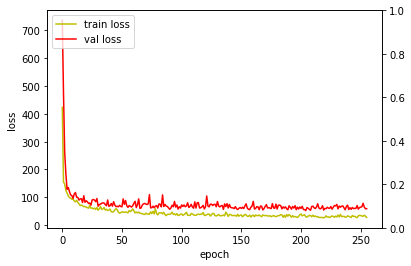

In [42]:


import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

#acc_ax.plot(history.history['dense_16_accuracy'], 'b', label='train acc') # 모델을 학습할 때 마다 이름을 수정해야함
#acc_ax.plot(history.history['val_dense_16_accuracy'], 'g', label='val acc') # 모델을 학습할 때 마다 이름을 수정해야함

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
#acc_ax.legend(loc='lower left')

plt.show()



In [49]:
y_pred_Lifting = Lifting.predict(X_test)

In [51]:
y_pred_Lifting

array([[  123.59008 ,   -14.517584,  3082.6536  , ...,  -358.02957 ,
          858.3197  ,  2434.3352  ],
       [  125.056   ,   -13.986151,  3081.952   , ...,  -357.80032 ,
          858.7282  ,  2432.9873  ],
       [  126.74353 ,   -13.934156,  3081.8726  , ...,  -356.6346  ,
          859.4414  ,  2431.733   ],
       ...,
       [-1260.7241  ,  -374.61752 ,  2265.4763  , ..., -1298.7378  ,
          840.2759  ,  2617.3257  ],
       [-1283.7336  ,  -372.9     ,  2257.0696  , ..., -1297.5464  ,
          837.6976  ,  2611.191   ],
       [-1302.8097  ,  -370.76535 ,  2248.7966  , ..., -1287.45    ,
          834.7717  ,  2607.3984  ]], dtype=float32)

In [53]:
print("Test Set 2D Annotation")
print(X_test.shape)
print(X_test)
print("Predicted 3D Annotation")
print(y_pred_Lifting.shape)
print(y_pred_Lifting)
print("Actual 3D Annotation")
print(y_test.shape)
print(y_test)

Test Set 2D Annotation
(3270, 34)
[[ 0.43096928  0.47050496  0.46549215 ...  1.01064463 -0.13031767
   1.11426265]
 [ 0.43313983  0.47166009  0.46632948 ...  1.01256834 -0.13069127
   1.11612867]
 [ 0.43548918  0.47128117  0.46694972 ...  1.01308626 -0.12916673
   1.1185036 ]
 ...
 [-2.28023123 -0.72007374 -2.26383012 ...  0.51669504 -1.69180055
   0.91318475]
 [-2.33150387 -0.72119845 -2.31382145 ...  0.51795285 -1.69546128
   0.90385465]
 [-2.37962788 -0.71995968 -2.35520696 ...  0.52527774 -1.68162586
   0.89248888]]
Predicted 3D Annotation
(3270, 51)
[[  123.59008    -14.517584  3082.6536   ...  -358.02957    858.3197
   2434.3352  ]
 [  125.056      -13.986151  3081.952    ...  -357.80032    858.7282
   2432.9873  ]
 [  126.74353    -13.934156  3081.8726   ...  -356.6346     859.4414
   2431.733   ]
 ...
 [-1260.7241    -374.61752   2265.4763   ... -1298.7378     840.2759
   2617.3257  ]
 [-1283.7336    -372.9       2257.0696   ... -1297.5464     837.6976
   2611.191   ]
 [-1302.8

In [54]:
### 모델 성능 평가 

In [55]:
def euclidean_losses(pred, gt):
    """Calculate the average Euclidean loss for multi-point samples.
    Each sample must contain `n` points, each with `d` dimensions. For example,
    in the MPII human pose estimation task n=16 (16 joint locations) and
    d=2 (locations are 2D).
    Args:
        actual (Tensor): Predictions (B x L x D)
        target (Tensor): Ground truth target (B x L x D)
    """

    #assert pred.size() == gt.size(), 'input tensors must have the same size'

    # Calculate Euclidean distances between actual and target locations
    temp = pred - gt
    temp = np.power(temp,2).sum(-1)
    temp = np.sqrt(temp)
    return temp

def mpjpe(actual, expected, included_joints=None):
    dists = euclidean_losses(actual, expected)
    print(dists.shape)
    if included_joints is not None:
        dists = dists.reshape(-1, included_joints)
    return dists.mean().item()

In [56]:
euclidean_losses(y_pred_Lifting,y_test).shape

(3270,)

In [58]:
mpjpe(y_test,y_pred_Lifting)

(3270,)


606.1264676852636

In [ ]:
### 학습된 모델 저장 

In [ ]:
# data: S1 / Seq1+Seq2 / video8 / imageFrames 
# 17 skeletons 
# Martinez (2017) model         
# epoch: 250
# batch size: 256
# 2D Scaled by Scikit-Learn Standard Scaling 
# test split: 0.20 
# val split: test size
# activation function: ReLu
# residual block: 4 
# loss function: MAE
# optimizer: Adam 

In [59]:
# 모델 저장 

#Lifting.save('/content/gdrive/MyDrive/Colab Notebooks/model_1.h5')